# Intermediate Assessment Coding Test

# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

The aim is to build a predictive model and predict the sales of each product at a particular outlet.

**Objective:**

* Exploratory Data Analysis
* Pre-processing
* Modelling
* Fine tuning

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
# Training data set

df_train = pd.read_csv('train_v9rqX0R.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Testing data set

df_test = pd.read_csv('test_AbJTz2l.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_test_copy = pd.read_csv('test_AbJTz2l.csv')

### Dataset Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.shape

(8523, 12)

In [7]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_test.shape

(5681, 11)

In [11]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Inferences:**

* Training data set is having 8523 observations and 12 features (including target)
* 'Item_Outlet_Sales': is the target.
* There are some missing values in Item_weight and Outlet_size features.
* Test data set is having 5681 observations and 11 features.
* There are missing values in Item_weight and Outlet_size features.
* Bothr of them having data types of object, float64, int64.

### Exploratory Data Analysis

In [12]:
df_train['Item_Type'].nunique()

16

In [13]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

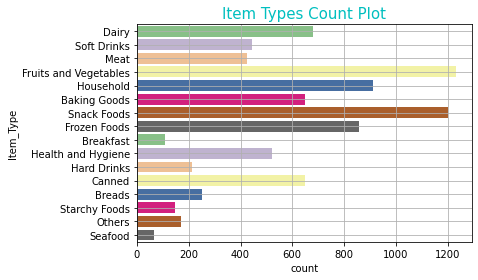

In [14]:
sns.countplot(y='Item_Type',palette='Accent',data = df_train)
plt.title('Item Types Count Plot', fontsize=15,c='c')

plt.grid()

**Insights:**

* There are 16 unique item types.
* Among them Fruits and vegitables have the largest count (1232) and the second is by snacks foods (1200)
* Seafood item type having the lowest count (64), 2nd lowest is breakfast (110)

In [15]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

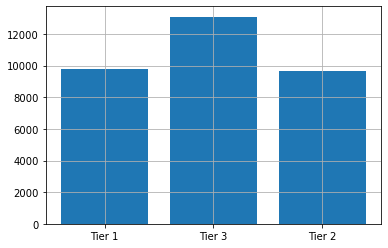

In [16]:
plt.bar(df_train['Outlet_Location_Type'],df_train['Item_Outlet_Sales'])

plt.grid()

**Insights:**

* There are mainly 3 types of outlet locations (Tier1, Tier2, Tier3)
* Tier 3 have comparitively large amount sales with more than
* Tier 1 and Tier 2 an some what similar.

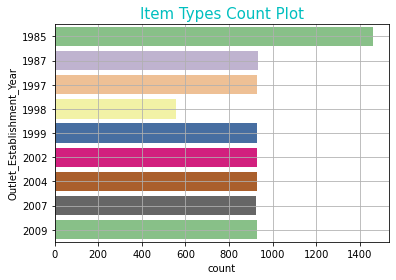

In [17]:
sns.countplot(y='Outlet_Establishment_Year',palette='Accent',data = df_train)
plt.title('Item Types Count Plot', fontsize=15,c='c')

plt.grid()

**Insights:**

* Most number of outlets are established in 1985, which is more than 1400.
* Least number of outlets are established in 1998, which is below 600.


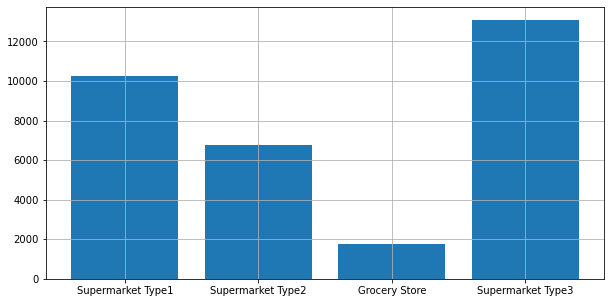

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data = df_train, x ='Outlet_Type',height = 'Item_Outlet_Sales')

plt.grid()

**Insight:**

* Supermarket Type 3 have resulting in maximum sales.
* Least sales reported by Grocery Store

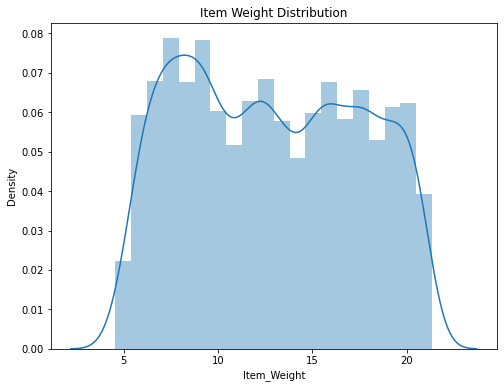

In [19]:
# Item_Weight Distribution
plt.figure(figsize = (8,6))
sns.distplot(df_train['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

**Insight:**

* Item weight is distributed over around 5 and around 20

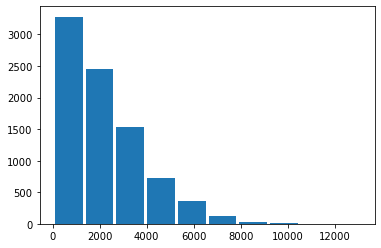

In [20]:
plt.hist(df_train['Item_Outlet_Sales'],rwidth=0.9)
plt.show()

**Insights:**

* Most of the sales values are below 4000

### Data Preprocessing

In [21]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Handling the missing value

In [22]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [23]:
Outlet_size_mode = df_train['Outlet_Size'].mode()[0]

df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(Outlet_size_mode)

**Inferences:**

* Oulet size is categorical feature, we can fill the null values with mode.

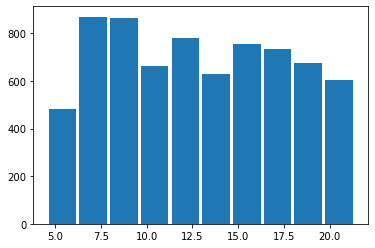

In [24]:
plt.hist(df_train['Item_Weight'],rwidth=0.9)
plt.show()

<AxesSubplot:xlabel='Item_Weight'>

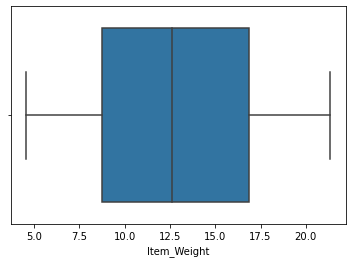

In [25]:
sns.boxplot(df_train['Item_Weight'])

In [26]:
Item_weight_median = df_train['Item_Weight'].median()

df_train['Item_Weight'] = df_train['Item_Weight'].fillna(Item_weight_median)

**Inferences:**

* This is numerical feature having no outliers.
* We can fill the null values with median

In [27]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Encoding Categorical fetures

In [28]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [30]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

**Inference:**

* Here in the data set, there are 5 types of entries are given.
* But in actuall there are 2 categories, Low Fat and Regular.
* Other misspelled entries are re lablled to respective categories.

In [31]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [32]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})

In [33]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [34]:
df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

In [35]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [36]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

**Inference:**

* Item fat content, Outlet size, outlet location type: these encoded manully by mapping.
* Outlet type and Item type are encoded using label encoding.

In [38]:
# since ID columns are unique we can drop them

df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [39]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,1,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,3,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,1,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,3,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,2,3,1,994.7052


### Scaling of data set

In [40]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
# since the 3 columns item weight, item visibility, item mrp have values with huge difference. we can scale them.

num_cols = ['Item_Weight','Item_Visibility','Item_MRP']

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train.loc[:,num_cols] = sc.fit_transform(df_train[num_cols])

In [43]:
# Data preprocessing for test data

# we want to perform all the preprocrssing we have done over training data set to test data set too.

Outlet_size_mode = df_test['Outlet_Size'].mode()[0]

df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(Outlet_size_mode)

Item_weight_median = df_test['Item_Weight'].median()

df_test['Item_Weight'] = df_test['Item_Weight'].fillna(Item_weight_median)

In [44]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

df_test['Outlet_Size'] = df_test['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})

df_test['Outlet_Location_Type'] = df_test['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

df_test['Outlet_Type'] = le.fit_transform(df_test['Outlet_Type'])

df_test['Item_Type'] = le.fit_transform(df_test['Item_Type'])

In [45]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [46]:
df_test.loc[:,num_cols] = sc.fit_transform(df_test[num_cols])

### Modelling

In [47]:
X = df_train.drop('Item_Outlet_Sales',axis=1)
test = df_test

y = df_train['Item_Outlet_Sales']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

1419234.5543642403

In [51]:
y_pred

array([2825.276943  , 3838.10886446,  418.89837881, ..., 2300.78466054,
       2443.1008116 ,  371.66644605])

#### KNN Regresssor

In [52]:
# Import the knn regressor class 
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# Use the fit method on training data
knn.fit(X_train, y_train)
# Use the predict method on test data
y_pred_knn = knn.predict(X_test)
mean_squared_error(y_test, y_pred_knn)

1315113.0752838964

#### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
# Use the fit method on training data
rf_reg.fit(X_train, y_train)
# Use the predict method on test data
y_pred_rf = rf_reg.predict(X_test)

## calculate the mean square error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

1235336.70


**Inference:**

* Among the 3 models tried, **Random forest regressor** give comparitevly low mse value.

### Fine Tuning

In [54]:
# we can try Hyper Opt technique to get best parameters for our model.

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [55]:

space = {
    "max_depth": hp.choice("max_depth", [5,10,15,20]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1,2,3,4,5]),
    "min_samples_split":hp.choice("min_samples_split",[2,3,4,5,6]),
    "n_estimators": hp.choice("n_estimators", [50,100,200,400,600]),
}

In [56]:
# define objective function

from sklearn.model_selection import cross_val_score

def hyperparameter_tuning(params):
    clf = RandomForestRegressor(**params,n_jobs=-1)
    acc = mean_squared_error(y_test, y_pred_rf).mean()
    return {"loss": -acc, "status": STATUS_OK}

In [57]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|███████████████████████████████████████████████| 50/50 [00:00<00:00, 76.15trial/s, best loss: -1235336.7013688996]
Best: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1}


#### After hyper parameter tuning

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=15,n_estimators=50,min_samples_split=4,min_samples_leaf=3)
# Use the fit method on training data
rf_reg.fit(X_train, y_train)
# Use the predict method on test data
y_pred_rf = rf_reg.predict(X_test)

## calculate the mean square error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

1226778.00


#### Prediction using hyper tuned model and test data set

In [59]:
y_pred_rf = rf_reg.predict(test)

In [60]:
y_pred_rf

array([1543.56698599, 1498.11866757,  715.58329622, ..., 1728.71776174,
       3881.58950235, 1510.10836621])

In [61]:
# Creation of submision csv file, having IDs and predictions

submission = pd.DataFrame()
submission[["Item_Identifier","Outlet_Identifier"]] = df_test_copy[["Item_Identifier","Outlet_Identifier"]]
submission["Item_Outlet_Sales"] = abs(y_pred_rf)

In [62]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1543.566986
1,FDW14,OUT017,1498.118668
2,NCN55,OUT010,715.583296
3,FDQ58,OUT017,2341.342679
4,FDY38,OUT027,6202.511324
...,...,...,...
5676,FDB58,OUT046,2294.700025
5677,FDD47,OUT018,2735.796728
5678,NCO17,OUT045,1728.717762
5679,FDJ26,OUT017,3881.589502


In [63]:
submission.to_csv("submission.csv",index = False)

##### Jibin K Joy, ML & AI, KKEM August 2022 Batch